## Data Cleanning


* Curso: https://www.udemy.com/course/analise-dados-python

In [1]:
import warnings
warnings.simplefilter("ignore")

### Extrair dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = "./dados/caso_estudo.xlsx"

In [4]:
dfClientes = pd.read_excel(dataset, sheet_name='clientes')
dfLojas = pd.read_excel(dataset, sheet_name='lojas')
dfProdutos = pd.read_excel(dataset, sheet_name='produtos')
dfVendas = pd.read_excel(dataset, sheet_name='vendas')
dfPag = pd.read_excel(dataset, sheet_name='pagamentos')

### Null Data

* Clientes

In [5]:
dfClientes[dfClientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [6]:
# dfClientes.nome[1]
dfClientes.loc[1, "nome"]

'Caio Pereira'

In [7]:
dfClientes.loc[dfClientes.nome.isnull(), "nome"] = "Sem Nome"
dfClientes.loc[dfClientes.sexo.isnull(), "sexo"] = "O"
dfClientes.loc[dfClientes.dt_nasc.isnull(), "dt_nasc"] = "1/1/2024"


In [8]:
dfClientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

In [9]:
dfClientes.loc[[269,287],:]

,id,nome,sexo,dt_nasc
269,270,Sem Nome,M,1/1/2024
287,288,Victor Ribeiro,O,12/17/1974


### Outliers 

In [10]:
dfProdutos.loc[9, "valor"] = dfProdutos.loc[9, "valor"] / 10000

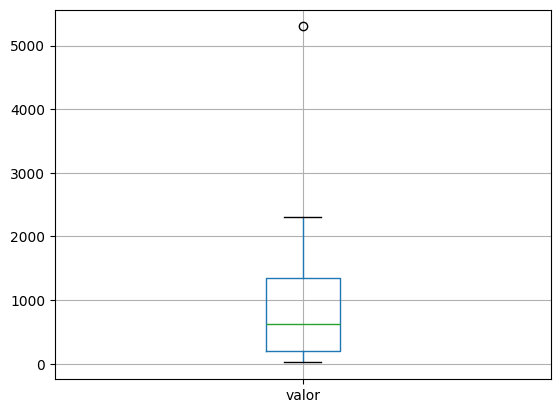

In [11]:
dfProdutos.boxplot(column=["valor"])
plt.show()

### Integrity

In [12]:
~dfVendas.id_cliente.isin(dfClientes.id).any()

False

In [13]:
~dfVendas.id_cliente.isin(dfClientes.id).any()

False

In [14]:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [15]:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)].count()

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [16]:
~dfVendas.id_loja.isin(dfLojas.id).any()

False

In [17]:
~dfVendas.id_produto.isin(dfProdutos.id).any()

False

### Duplicated 

In [18]:
dfClientes.nome.duplicated().sum()

109

In [19]:
dfClientes[dfClientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [20]:
dfClientes[dfClientes.nome == "Anna Melo"]

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [21]:
dfClientes.drop("id", axis=1).duplicated().sum()

0

In [22]:
dfClientes.columns

Index(['id', 'nome', 'sexo', 'dt_nasc'], dtype='object')

### Formatting 

In [23]:
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format = "%m/%d/%Y")

In [24]:
dfClientes.dt_nasc 

0     1975-05-02
1     1978-04-16
2     1952-11-04
3     1937-02-24
4     1953-05-06
         ...    
995   1946-02-08
996   1979-06-15
997   1946-03-15
998   1994-06-20
999   1975-12-30
Name: dt_nasc, Length: 1000, dtype: datetime64[ns]

### Primary Key (Index)

In [25]:
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


In [26]:
dfClientes = dfClientes.set_index("id")
dfLojas = dfLojas.set_index("id")
dfProdutos = dfProdutos.set_index("id")
dfVendas = dfVendas.set_index("id")
dfPag = dfPag.set_index("id")

In [27]:
dfClientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [28]:
dfClientes.index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
      dtype='int64', name='id', length=1000)

### Normalization/Standarization